# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [28]:
from math import log10


def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000, m=1):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    xn = x0
    for i in range(maxiter):
        x_prev = xn
        xn = x_prev - m*f(x_prev)/fder(x_prev)
#        print(xn, m)
        if abs(xn-x_prev)/m < eps*abs(xn):
            break
    return (round(xn,int(log10((1/eps)+1))), i+1,m) 

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [24]:
def func1(x):
    return x**2-1
def func1_der(x):
    return 2*x


starting_points = [float(i) for i in range(10,30)]
x_min = [newton_iteration(func1, func1_der, x) for x in starting_points ]
print("Starting from: ", '\n', starting_points , "\n", "minimum point:", "\n", x_min)

Starting from:  
 [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0] 
 minimum point: 
 [(1.0, 7), (1.0, 8), (1.0, 8), (1.0, 8), (1.0, 8), (1.0, 8), (1.0, 8), (1.0, 8), (1.0, 8), (1.0, 8), (1.0, 8), (1.0, 9), (1.0, 9), (1.0, 9), (1.0, 9), (1.0, 9), (1.0, 9), (1.0, 9), (1.0, 9), (1.0, 9)]


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [2]:
def func2(x):
    return (x**2-1)**2
def func2_der(x):
    return 4*x*(-1+x**2)

x1_forfunc2 = 2.  
x2_forfunc2 = -x1_forfunc2
m = [float(i) for i in range(1,6)]
x1_min = [newton_iteration(func2, func2_der, x1_forfunc2, m=coeff) for coeff in m ]
#   x2_min = [newton_iteration(func2, func2_der, x2_forfunc2, m=coeff) for coeff in m ]
print("Coefficient m: ", '\n', m , "\n", "minimum point (staring from -152.047):", "\n", x1_min, "\n","minimum point (staring from 152.047):", "\n")#, x2_min)

Coefficient m:  
 [1.0, 2.0, 3.0, 4.0, 5.0] 
 minimum point (staring from -152.047): 
 [(1.00001, 18, 1.0), (1.0, 5, 2.0), (1.0, 17, 3.0), (2.0, 1000, 4.0), (0.55067, 1000, 5.0)] 
 minimum point (staring from 152.047): 



# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

Не знаю зачем, но вот решение и число итераций соответственно:  (0.6417143225927436, 363)


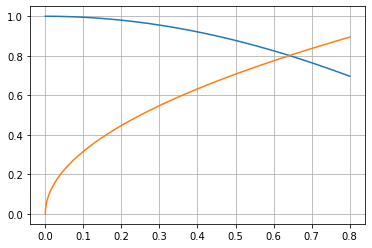

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import math as m


x = np.linspace(0,0.8,1000)
plt.plot(x, np.cos(x))
plt.plot(x, np.sqrt(x))
plt.grid(True)
def fixed_point_iter(f,x0, eps=1e-7, niter=int(1e5)):
    x_prev = x0
    for i in range(niter):
        x_curr = f(x_prev)
        if abs(x_prev-x_curr)<eps:
            break
        x_prev = x_curr
    return x_curr, i

print("Не знаю зачем, но вот решение и число итераций соответственно: ", fixed_point_iter(lambda x: 0.5*(1+m.cos(2*x)),0.1))
plt.show()

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [29]:
def f_2(x):
    return (x ** 2 - 1) ** 2
def fder_2(x):
    return (2 * (x ** 2 - 1) * 2 * x)
for i in range(1, 6):
    print(newton_iteration(f_2, fder_2, 2, m=i))

(1.00001, 18, 1)
(1.0, 5, 2)
(0.99999, 15, 3)
(2.0, 1000, 4)
(0.55067, 1000, 5)
